In [4]:
# Generate Word Clouds

import PyPDF2
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path

_STOPWORDS = ["et", "al", "SLUB", "Dresden", "Copyright", "American"]


def get_docs_path(docs_path, entity=None):
    if entity is not None:
        all_paths = [p for p in Path(docs_path).rglob("*.pdf") if entity in str(p)]
    else:
        all_paths = list(Path(docs_path).rglob('*.pdf'))
    esmo_paths = [p for p in all_paths if "ESMO" in str(p)]
    asco_paths = [p for p in all_paths if "ASCO" in str(p)]
    
    return {"ESMO": esmo_paths, "ASCO": asco_paths}


def extract_pdf_text(pdf_paths):
    doc_per_source = {}
    for key, paths in pdf_paths.items():
        full_doc = []
        for path in paths:
            with open(path, 'rb') as f:
                pdf_reader = PyPDF2.PdfReader(f)
                text = ""
                for page_num in range(len(pdf_reader.pages)):
                    page = pdf_reader.pages[page_num]
                    text += page.extract_text()
                full_doc.append(text)
        text = " ".join(full_doc)
        doc_per_source[key] = text  
    return doc_per_source


def gen_wordcloud(text, mask_path=None, width=800, height=800, 
                        background_color='white', colormap='viridis', 
                        min_font_size=10, max_font_size=100, max_words=150):
    
    mask_image = np.array(Image.open(mask_path)) if mask_path else None
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.update(_STOPWORDS)
    
    wordcloud = WordCloud(
        width=width,
        height=height, 
        background_color=background_color, 
        colormap=colormap,
        min_font_size=min_font_size, 
        max_font_size=max_font_size,
        mask=mask_image, 
        stopwords=custom_stopwords,
        max_words=max_words,
    ).generate(text)

    return wordcloud


def generate_wordclouds(text_d, save_path=None, entity=None, colormap=None):
    wc_base_path = Path("./Figures/WordClouds/").resolve()
    fig, ax = plt.subplots(2, 1, figsize=(12,6))
    #fig.suptitle(f"Word clouds for {entity}", fontsize=12, fontweight="bold")
    for i, (key, value) in enumerate(text_d.items()):
        wc = gen_wordcloud(value, mask_path=None, colormap=colormap)
        ax[i].imshow(wc, interpolation='bilinear')
        ax[i].axis('off')
        ax[i].set_title(key, fontsize=10)
    if save_path is not None:
        full_path = wc_base_path / save_path
        full_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(full_path, format='png', bbox_inches='tight', pad_inches=0.5, dpi=500)
        print(f"Saved Wordcloud unter {full_path}")
    plt.show()

In [2]:
data_path = "/mnt/bulk/dferber/catchy/LLM_Vector/Vector_LLM_for_Medical_QA/Data"

crc_paths = get_docs_path(data_path, "mCRC")
hcc_paths = get_docs_path(data_path, "HCC")
paca_paths = get_docs_path(data_path, "PancreaticCancer")

crc_text = extract_pdf_text(crc_paths)
hcc_text = extract_pdf_text(hcc_paths)
paca_text = extract_pdf_text(paca_paths)

Saved Wordcloud unter /mnt/bulk/dferber/catchy/LLM_Vector/Vector_LLM_for_Medical_QA/Figures/WordClouds/mcrc_green.png


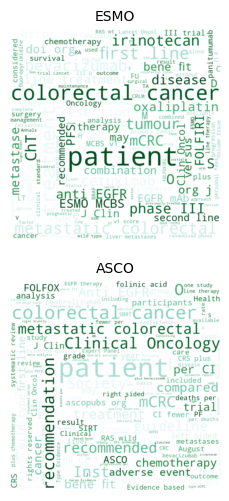

In [15]:
# CRC visualisation
generate_wordclouds(crc_text, save_path="mcrc_green.png", entity="mCRC", colormap="BuGn")        

Saved Wordcloud unter /mnt/bulk/dferber/catchy/LLM_Vector/Vector_LLM_for_Medical_QA/Figures/WordClouds/paca_green.png


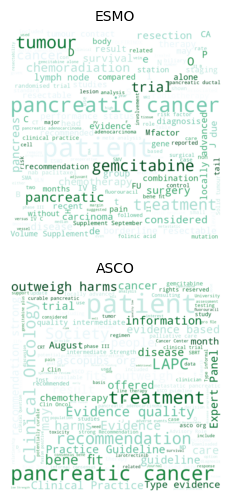

In [16]:
# PaCa visualisation
generate_wordclouds(paca_text, "paca_green.png", entity="Pancreatic Cancer", colormap="BuGn")        

Saved Wordcloud unter /mnt/bulk/dferber/catchy/LLM_Vector/Vector_LLM_for_Medical_QA/Figures/WordClouds/hcc_green.png


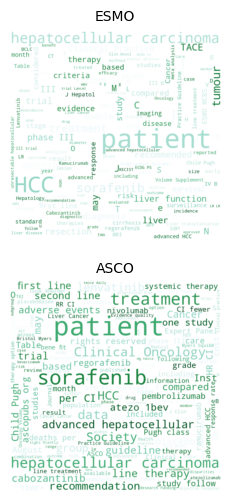

In [17]:
# HCC visualisation
generate_wordclouds(hcc_text, "hcc_green.png", entity="HCC", colormap="BuGn")      